In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [5]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.00,NaN,513,4.0,DPM,NaN,14.93,CuZnAl-3,90.0,0.19,...,NaN,NaN,Al2O3,0.6639,17.4,NaN,1.5625,NaN,54.2,NaN
1,3.03,NaN,513,4.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,59.8,NaN,5.6700,NaN,73.9,NaN
2,3.03,NaN,533,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,58.2,NaN,4.6242,NaN,62.5,NaN
3,3.03,NaN,513,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,49.9,NaN,4.0900,NaN,64.5,NaN
4,3.03,NaN,513,2.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,40.0,NaN,6.7662,NaN,54.1,NaN


# EDA and FEATURE ENGG

In [6]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.67,13.3,31.6,0.2340,0.102,NaN,0.6639,17.4,1.5625,54.2
1,3.03,513,4.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,59.8,5.6700,73.9
2,3.03,533,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,58.2,4.6242,62.5
3,3.03,513,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,49.9,4.0900,64.5
4,3.03,513,2.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,40.0,6.7662,54.1


In [7]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [8]:
#HANDLING NULL VALUES

In [9]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [10]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [11]:
#LABEL ENCODING for Preparation Method

In [12]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

In [13]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.40,1.562500,54.2
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,59.80,5.670000,73.9
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,58.20,4.624200,62.5
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,49.90,4.090000,64.5
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,40.00,6.766200,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.1,16.9,0.0900,0.0000,0.0,0.9100,9.77,3.008875,24.0
364,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.8,16.9,0.0900,0.0415,0.0,0.8685,9.77,18.360000,61.0
365,4.00,573,4.0,9,2.99,84.0,0.38,6.755,9.8,16.9,0.0900,0.0830,0.0,0.8270,9.77,3.008875,42.0
366,4.00,573,4.0,9,2.99,84.0,0.38,6.755,16.8,16.9,0.0900,0.1660,0.0,0.7440,9.77,3.008875,23.0


# CATALYST PROPERTY DATASET

In [14]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,0,1,2,3,0.1,1.1,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,0,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,1,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,2,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,4,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


# FINAL DATASET

In [15]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,...,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


In [16]:
X=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
X.shape


(368, 31)

In [17]:
Y=Data['CO2 Conv']
Y.shape


(368,)

In [18]:
#DATA STANDARDIZATION

In [19]:
scaling=StandardScaler()
X=scaling.fit_transform(X)
X.shape

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(368, 31)

# ML MODELS

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


In [21]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(294, 31)
(74, 31)
(294,)
(74,)


# Models with Default Parameter Values

In [22]:
# MODEL BUILDING

In [23]:
models=[Ridge(), Lasso(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), XGBRegressor()]


,Model,Training MSE,Test MSE,Training MAE,Test MAE,Training r2_score,Test r2_score
0,Ridge(),11.290877,16.825898,2.091131,2.596848,0.849311,0.774445
1,Lasso(),18.305783,18.676234,2.392592,2.610919,0.755689,0.749641
2,ElasticNet(),21.045448,22.978758,2.960823,3.274118,0.719126,0.691964
3,SVR(),30.915416,35.972200,2.786173,3.480906,0.587400,0.517784
4,KNeighborsRegressor(),12.583506,13.505574,2.056279,2.488459,0.832059,0.818955
5,DecisionTreeRegressor(),0.000000,2.542276,0.000000,0.532973,1.000000,0.965920
6,"(DecisionTreeRegressor(max_features='auto', ra...",0.779185,2.074270,0.170673,0.438230,0.989601,0.972194
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",1.448851,4.067960,0.978168,1.193314,0.980664,0.945468
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.000009,4.102379,0.002046,0.552762,1.000000,0.945007


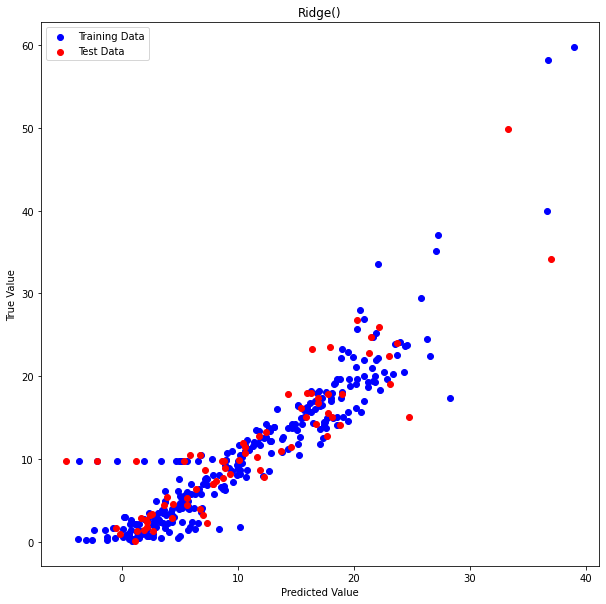

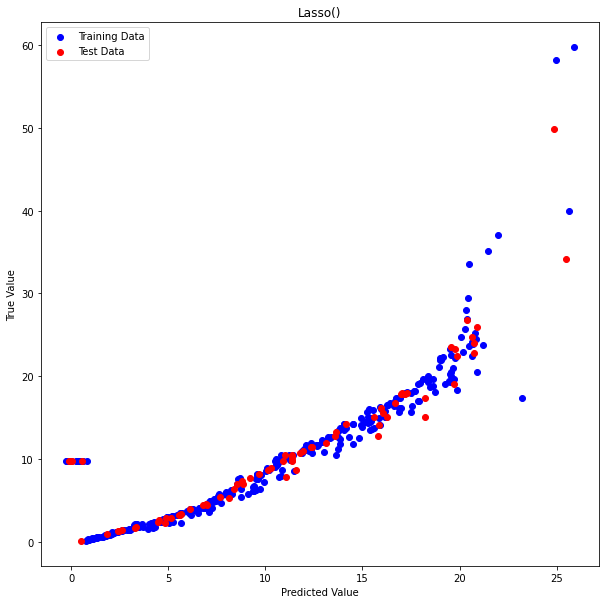

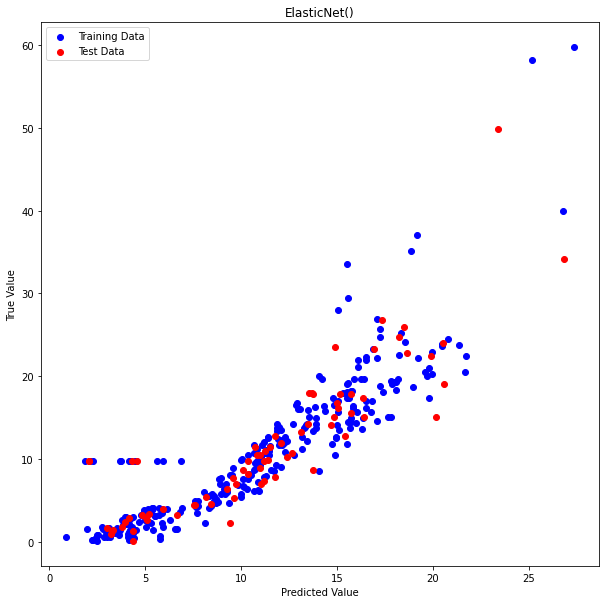

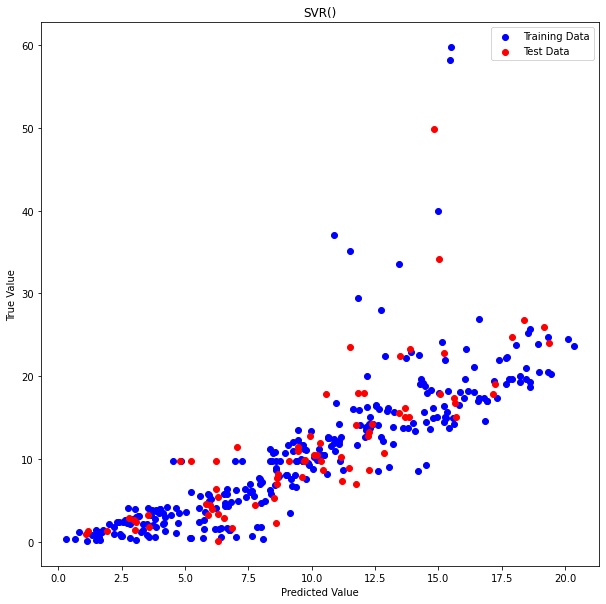

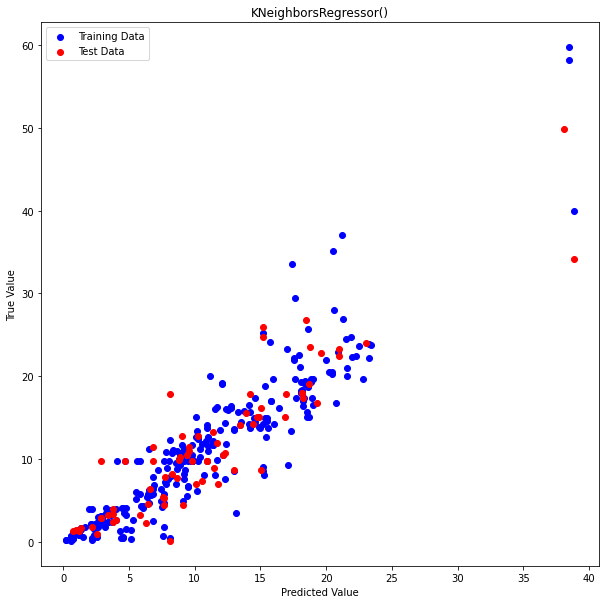

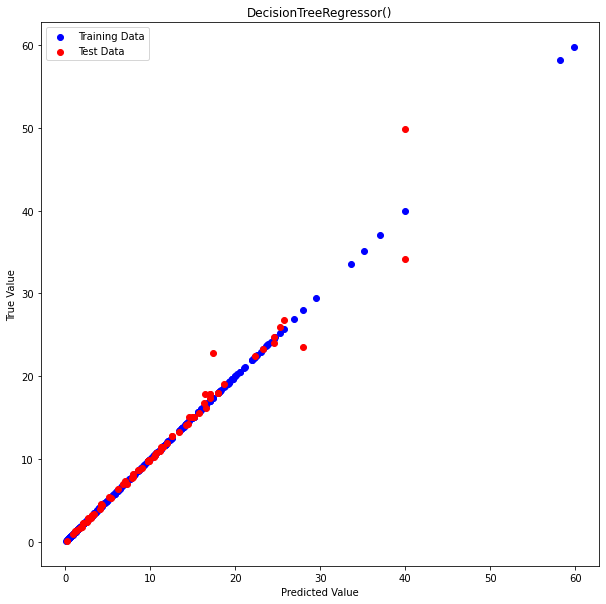

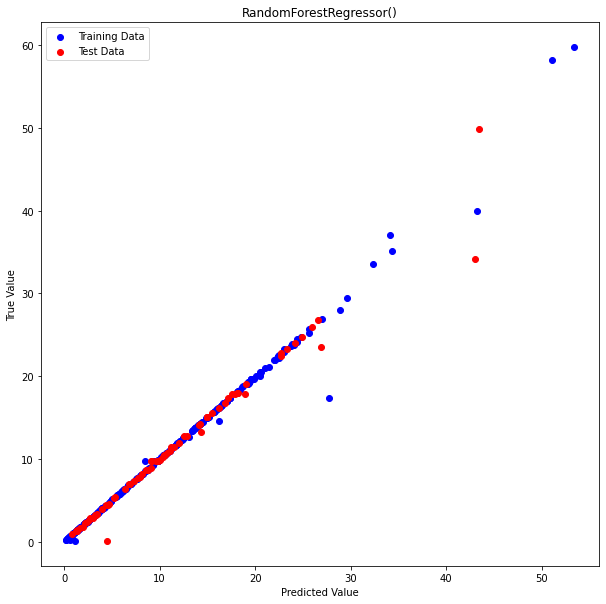

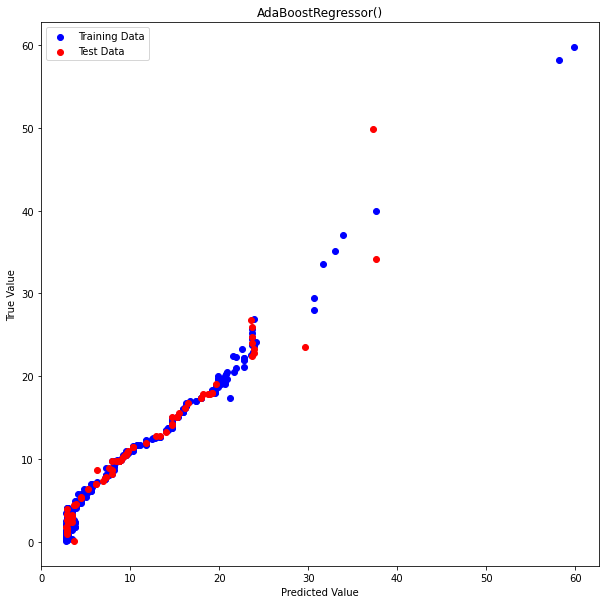

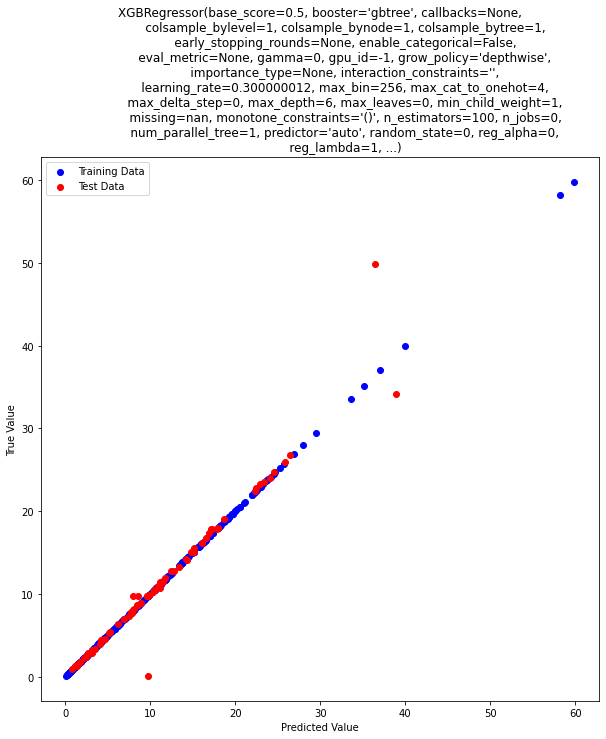

In [24]:
def compare_models():
    result=[]
    for model in models:
        model.fit(X_train,Y_train)
        Y_pred_train=model.predict(X_train)
        Y_pred_test=model.predict(X_test)
        plt.figure(figsize=(10,10))
        plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
        plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
        plt.xlabel('Predicted Value')
        plt.ylabel('True Value')
        plt.legend()
        plt.title(model)
        
        training_mse=(mean_squared_error(Y_train,Y_pred_train))
        test_mse=(mean_squared_error(Y_test,Y_pred_test))
        training_mae=mean_absolute_error(Y_train,Y_pred_train)
        test_mae=mean_absolute_error(Y_test,Y_pred_test)
        training_r2_score=r2_score(Y_train,Y_pred_train)
        test_r2_score=r2_score(Y_test,Y_pred_test)
        
        result.append({'Model':model,
                       'Training MSE':training_mse,'Training MAE':training_mae,'Training r2_score':training_r2_score,
                       'Test MSE':test_mse,'Test MAE':test_mae,'Test r2_score':test_r2_score})
    result_dataframe=pd.DataFrame(result,columns=['Model','Training MSE','Test MSE','Training MAE','Test MAE','Training r2_score','Test r2_score'])
    return result_dataframe
ML_models_accuracy=compare_models()
ML_models_accuracy

# CROSS VALIDATION

In [25]:
models=[Ridge(), Lasso(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), XGBRegressor()]
result=[]
def compare_models_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,X,Y,cv=10)
        mean_accuracy=sum(cv_score)/len(cv_score)
        result.append({'Model':model,'Mean Accuracy':mean_accuracy})
    result_dataframe=pd.DataFrame(result,columns=['Model','Mean Accuracy'])
    return result_dataframe
ML_models_cross_val_score=compare_models_cross_validation()
ML_models_cross_val_score

,Model,Mean Accuracy
0,Ridge(),-41.272757
1,Lasso(),-10.141572
2,ElasticNet(),-23.172154
3,SVR(),-50.757341
4,KNeighborsRegressor(),-40.114289
5,DecisionTreeRegressor(),-1.626993
6,RandomForestRegressor(),-1.488944
7,AdaBoostRegressor(),-8.100752
8,"XGBRegressor(base_score=None, booster=None, ca...",-0.420113


# Hypertuning of Parameters

In [26]:
from sklearn.model_selection import GridSearchCV

Ridge_Regressor

Training MSE: 11.287730334570867
Test MSE: 16.760613798343012

Training MAE: 2.091197377133609
Test MAE: 2.588336044260263

Training r2_score: 0.8493529884867999
Test r2_score: 0.7753200679541751
{'alpha': 0.1, 'max_iter': 250}


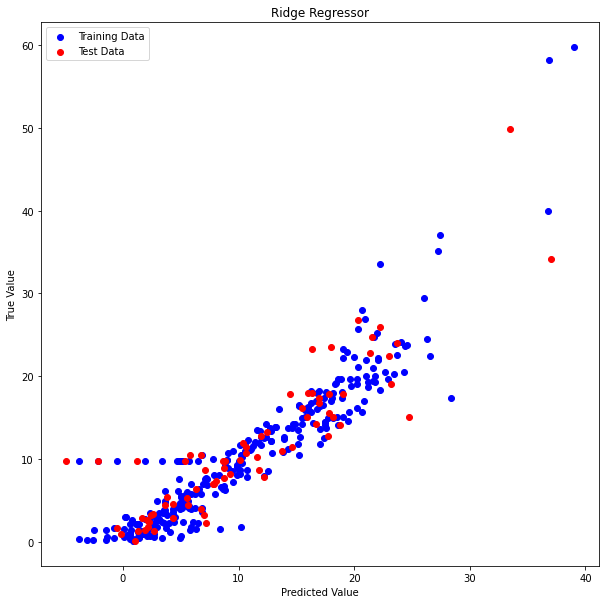

In [63]:
#Ridge Regressor
Ridge_regressor = Ridge(tol=0.001)
ridge_hyperparameters={'alpha':[0.01,0.1,0.001], 'max_iter':[250,150,500]}
Ridge_tuning=GridSearchCV(Ridge_regressor,ridge_hyperparameters,refit=True)
Ridge_tuning.fit(X_train, Y_train)

Y_pred_train = Ridge_tuning.predict(X_train)
Y_pred_test = Ridge_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Ridge Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Ridge_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Ridge_tuning.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+00, tolerance: 1.920e+00
  model = cd_fast.enet_coordinate_descent(


Lasso_Regressor

Training MSE: 18.30578298753881
Test MSE: 18.676234204314145

Training MAE: 2.392591888911054
Test MAE: 2.6109185380531286

Training r2_score: 0.755689459373788
Test r2_score: 0.7496407302033261
{'alpha': 1, 'max_iter': 500}


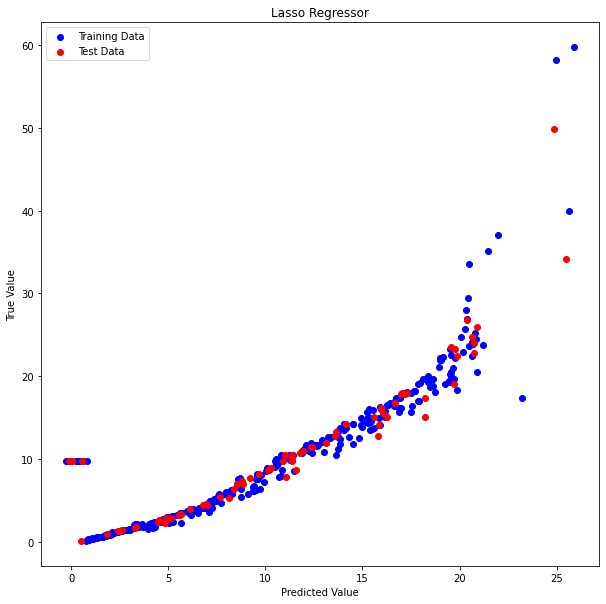

In [64]:
#Lasso Regressor
Lasso_regressor = Lasso(tol=0.0001)
lasso_hyperparameters={'alpha':[0.001,0.01,0.1,1],'max_iter':[500,200,1000]}
Lasso_tuning=GridSearchCV(Lasso_regressor,lasso_hyperparameters,refit=True)
Lasso_tuning.fit(X_train, Y_train)

Y_pred_train = Lasso_tuning.predict(X_train)
Y_pred_test = Lasso_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Lasso Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Lasso_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Lasso_tuning.best_params_)

Elastic_Net_Regressor

Training MSE: 11.836071261230174
Test MSE: 16.816922636032725

Training MAE: 2.0922367121401977
Test MAE: 2.5439196083307474

Training r2_score: 0.8420347837243591
Test r2_score: 0.7745652348688286
{'alpha': 0.1, 'max_iter': 750}


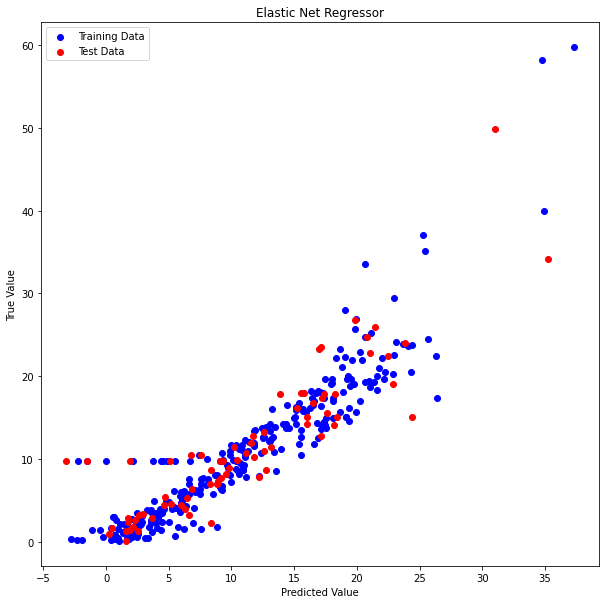

In [65]:
# Elastic Net Regressor
EN_regressor = ElasticNet(tol=0.0001)
elasticnet_hyperparameters={'alpha':[0.001,0.01,0.1,1],'max_iter':[750,500,1000]}
EN_tuning=GridSearchCV(EN_regressor,elasticnet_hyperparameters)#,refit=True)
EN_tuning.fit(X_train, Y_train) 

Y_pred_train = EN_tuning.predict(X_train)
Y_pred_test = EN_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Elastic Net Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Elastic_Net_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(EN_tuning.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider

Support Vector_Regressor

Training MSE: 17.789627919883298
Test MSE: 22.35635949631063

Training MAE: 1.4084638762188684
Test MAE: 1.768915887070372

Training r2_score: 0.7625781089175806
Test r2_score: 0.7003077934461033
{'epsilon': 0.01, 'kernel': 'linear', 'max_iter': 3000}


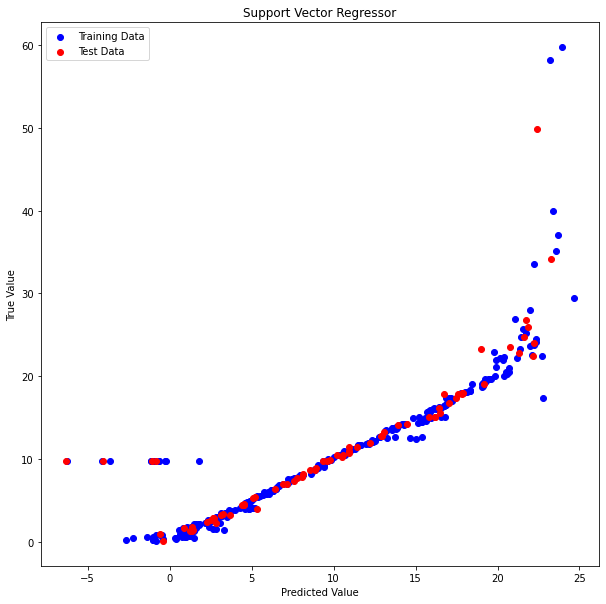

In [66]:
#SVM Regressor
SV_regressor = SVR(gamma='scale',tol=0.001, C=1.0)
svr_hyperparameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'max_iter':[4000,3000],'epsilon':[0.01,0.1]}
SVR_tuning=GridSearchCV(SV_regressor,svr_hyperparameters,refit=True)
SVR_tuning.fit(X_train, Y_train) 

Y_pred_train = SVR_tuning.predict(X_train)
Y_pred_test = SVR_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Support Vector Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Support Vector_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(SVR_tuning.best_params_)

KNN_Regressor

Training MSE: 7.4875607780612246
Test MSE: 19.640017314189187

Training MAE: 1.580807823129252
Test MAE: 2.6031418918918927

Training r2_score: 0.9000703754160638
Test r2_score: 0.7367209931197687
{'leaf_size': 2, 'n_neighbors': 4, 'p': 1}


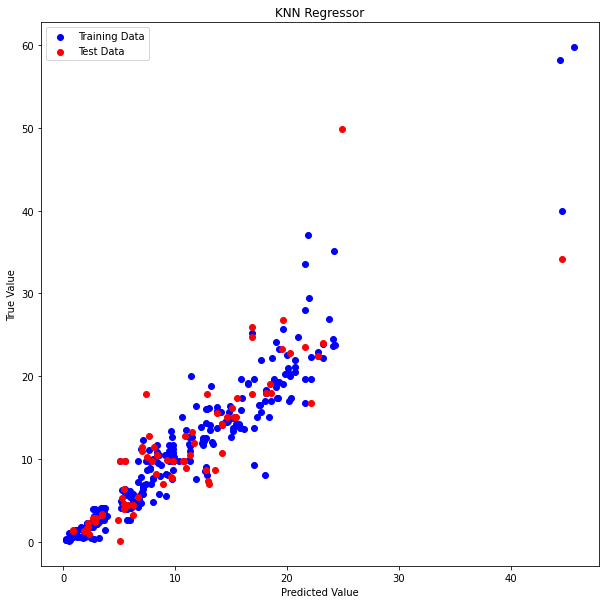

In [67]:
#KNN Regressor
KNN_regressor = KNeighborsRegressor(weights='uniform', algorithm='auto')
knr_hyperparameters={'p':[1,2],'n_neighbors':[2,4,6,8,10],'leaf_size':[2,4,6,8]}
KNN_tuning=GridSearchCV(KNN_regressor,knr_hyperparameters,refit=True)
KNN_tuning.fit(X_train, Y_train) 

Y_pred_train = KNN_tuning.predict(X_train)
Y_pred_test = KNN_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('KNN Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('KNN_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(KNN_tuning.best_params_)

Random Forest_Regressor

Training MSE: 1.3141509188838623
Test MSE: 2.1506358112726756

Training MAE: 0.23691248520973038
Test MAE: 0.4718394928562981

Training r2_score: 0.9824612297832055
Test r2_score: 0.9711702259985352
{'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 140}


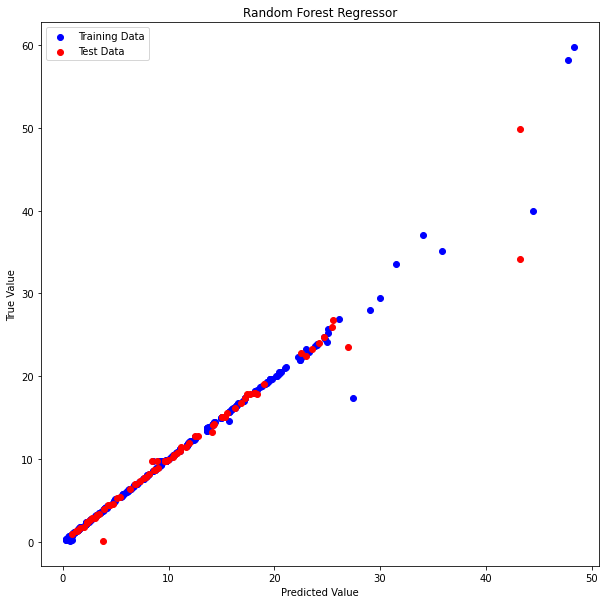

In [69]:
#Random Forest Regressor
RFR_regressor = RandomForestRegressor(random_state = 0,max_features='auto')
rfr_hyperparameters={'n_estimators':[100,120,140,160],
                       'min_samples_split':[4,6,8,10],
                        'min_samples_leaf':[1,2],
                        'max_leaf_nodes':[40,60,80],
                        'max_depth':[7,8,10,12]}
RFR_tuning=GridSearchCV(RFR_regressor,rfr_hyperparameters,refit=True)
RFR_tuning.fit(X_train, Y_train) 

Y_pred_train = RFR_tuning.predict(X_train)
Y_pred_test = RFR_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Random Forest Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Random Forest_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(RFR_tuning.best_params_)

AdaBoost_Regressor

Training MSE: 1.5183680773296657
Test MSE: 4.272116985006041

Training MAE: 0.9857922268842989
Test MAE: 1.24217673939863

Training r2_score: 0.9797357301736556
Test r2_score: 0.9427312767043254
{'loss': 'exponential', 'n_estimators': 120}


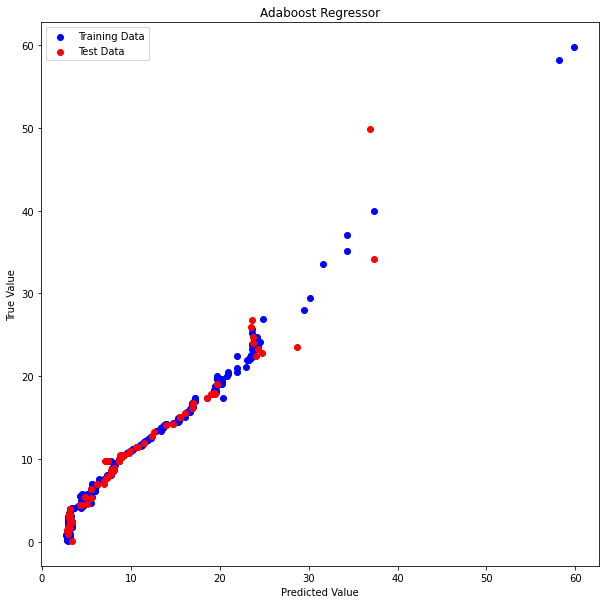

In [70]:
#Adaboost Regressor
Adab_regressor = AdaBoostRegressor()
adab_hyperparameters={'n_estimators':[120,60,80,100],'loss':['linear', 'square', 'exponential']}
Adab_tuning=GridSearchCV(Adab_regressor,adab_hyperparameters,refit=True)
Adab_tuning.fit(X_train, Y_train) 

Y_pred_train = Adab_tuning.predict(X_train)
Y_pred_test = Adab_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Adaboost Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('AdaBoost_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Adab_tuning.best_params_)

XGBoost_Regressor

Training MSE: 0.0004682706109535724
Test MSE: 3.1073261412330098

Training MAE: 0.011768926422612163
Test MAE: 0.4512375614771971

Training r2_score: 0.9999937504204983
Test r2_score: 0.9583455692818679
{'learning_rate': 0.1, 'max_depth': 6, 'sampling_method': 'uniform'}


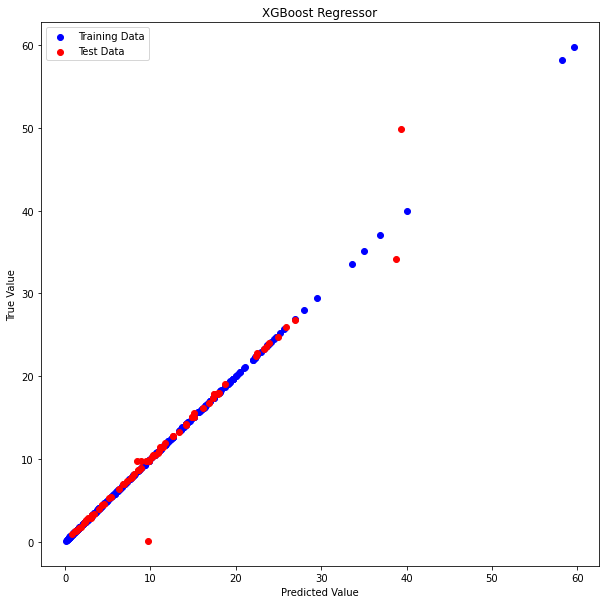

In [71]:
#XGBoost Regressor
XGB_regressor = XGBRegressor()
XGB_hyperparameters={'sampling_method':['uniform','gradient_based'],'max_depth':[6,8,10],'learning_rate':[0.01,0.1,0.3]}
XGB_tuning=GridSearchCV(XGB_regressor,XGB_hyperparameters,refit=True)
XGB_tuning.fit(X_train, Y_train) 

Y_pred_train = XGB_tuning.predict(X_train)
Y_pred_test = XGB_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('XGBoost Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('XGBoost_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(XGB_tuning.best_params_)